In [1010]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1011]:
train_df=pd.read_csv('train_ajEneEa.csv')
test_df=pd.read_csv('test_v2akXPA.csv')
#train_df=pd.read_csv('final_train.csv')

In [926]:
train_df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0


In [840]:
train_df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [216]:
train_df.shape

(43400, 12)

In [217]:
test_df.shape

(18601, 11)

In [309]:
#printing missing values in each coloumn in both train n test DF
k=pd.DataFrame()
k['train_df']=train_df.isnull().sum()
k['test_df']=test_df.isnull().sum()
k


,train_df,test_df
id,0,NaN
gender,0,NaN
age,0,0.0
hypertension,0,0.0
heart_disease,0,0.0
ever_married,0,NaN
work_type,0,NaN
Residence_type,0,NaN
avg_glucose_level,0,0.0
bmi,0,0.0


In [310]:
#Printing unique values in every coloumn
def uniq(df):
    col = df.columns
    for i in col:
        print('\n Unique value of "{}" is "{}" '.format(i,df[i].nunique()))
        #print(df[i].unique())
uniq(train_df)


 Unique value of "id" is "43400" 

 Unique value of "gender" is "3" 

 Unique value of "age" is "104" 

 Unique value of "hypertension" is "2" 

 Unique value of "heart_disease" is "2" 

 Unique value of "ever_married" is "2" 

 Unique value of "work_type" is "5" 

 Unique value of "Residence_type" is "2" 

 Unique value of "avg_glucose_level" is "12543" 

 Unique value of "bmi" is "556" 

 Unique value of "smoking_status" is "3" 

 Unique value of "stroke" is "2" 


In [220]:
train_df['gender'].unique()


array(['Male', 'Female', 'Other'], dtype=object)

In [221]:
train_df['work_type'].unique()

array(['children', 'Private', 'Never_worked', 'Self-employed', 'Govt_job'], dtype=object)

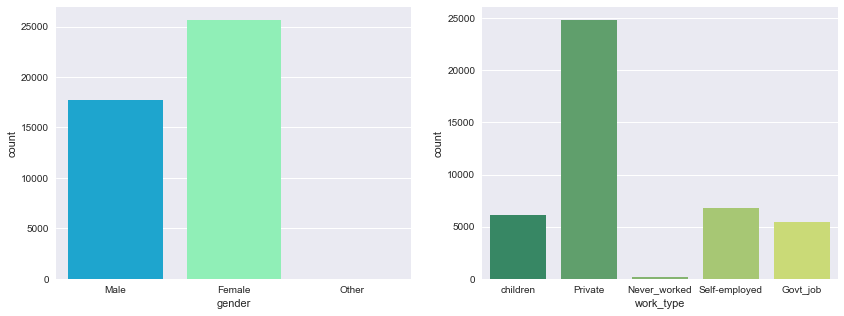

In [172]:
fig ,ax = plt.subplots(1,2,figsize=(14,5))
ax1,ax2, = ax.flatten()
sns.countplot(train_df['gender'],palette='rainbow',ax=ax1)
sns.countplot(train_df['work_type'],palette='summer',ax=ax2)

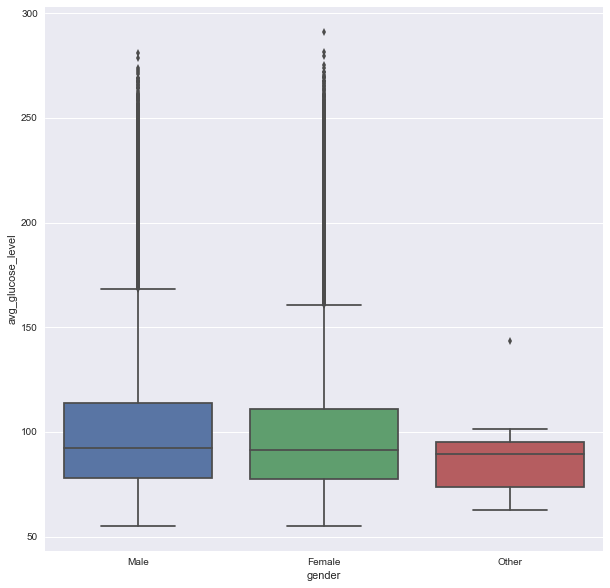

In [173]:
plt.subplots(figsize=(10,10))
sns.boxplot(y='avg_glucose_level',x='gender', data=train_df)

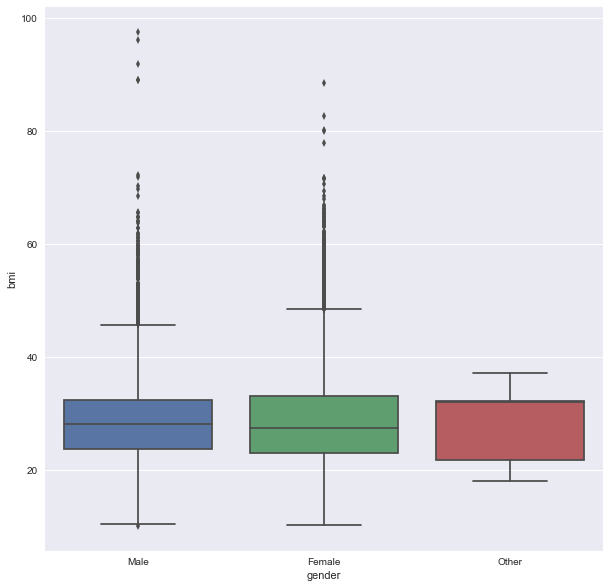

In [174]:
plt.subplots(figsize=(10,10))
sns.boxplot(y='bmi',x='gender', data=train_df)

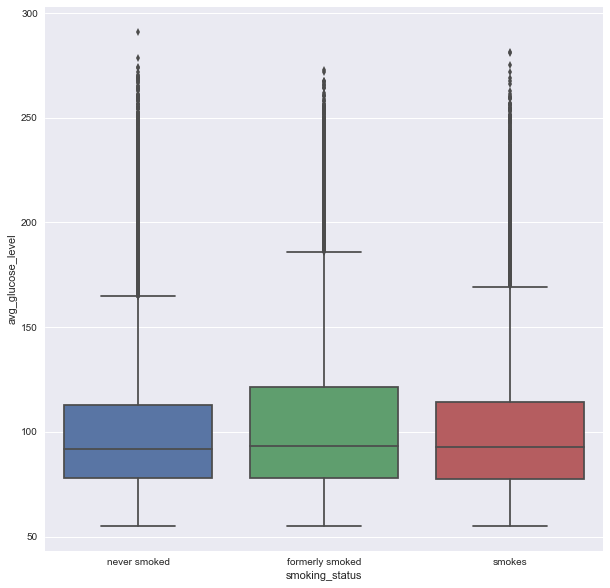

In [175]:
plt.subplots(figsize=(10,10))
sns.boxplot(y='avg_glucose_level',x='smoking_status', data=train_df)

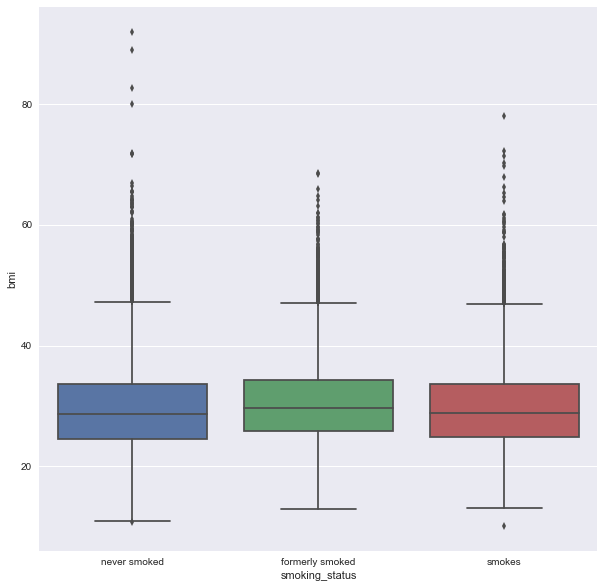

In [177]:
plt.subplots(figsize=(10,10))
sns.boxplot(y='bmi',x='smoking_status', data=train_df)

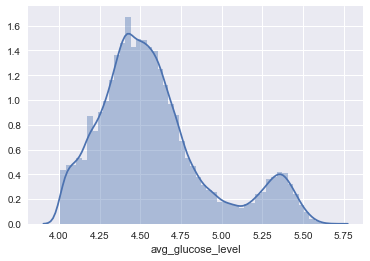

In [449]:
#train_df['avg_glucose_level']=np.log(train_df['avg_glucose_level'])
#test_df['avg_glucose_level']=np.log(test_df['avg_glucose_level'])

sns.distplot(train_df['avg_glucose_level'])


In [1012]:
# replace bmi by the mean bmi 
train_df['bmi']=train_df['bmi'].fillna(train_df['bmi'].median())
test_df['bmi']=test_df['bmi'].fillna(test_df['bmi'].median())


In [901]:
train_df['bmi'].mean()

28.57455069124366

In [782]:
#delete all the rows with missing smoking status
#train_df.dropna(inplace=True)import seaborn as sns


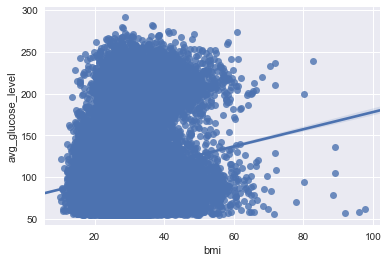

In [783]:
sns.regplot(x=train_df["bmi"], y=train_df["avg_glucose_level"])
sns.plt.show()


In [928]:
def outlier(df):
        quartile_1,quartile_3 = np.percentile(df['avg_glucose_level'],[25,75])
        quartile_f,quartile_l = np.percentile(df['avg_glucose_level'],[1,99])
        IQR = quartile_3-quartile_1
        lower_bound = quartile_1 - (1.5*IQR)
        upper_bound = quartile_3 + (1.5*IQR)
        print(lower_bound,upper_bound)
        print(quartile_f,quartile_l)
        
        df['avg_glucose_level'].loc[df['avg_glucose_level'] < lower_bound] = quartile_f
        df['avg_glucose_level'].loc[df['avg_glucose_level'] > upper_bound] = quartile_l
        
outlier(train_df)
outlier(test_df)

25.745 163.865
56.3 239.1902
25.41 164.45
56.17 239.02


C:\Users\Kai\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [929]:
def outlier1(df):
        quartile_1,quartile_3 = np.percentile(df['bmi'],[25,75])
        quartile_f,quartile_l = np.percentile(df['bmi'],[1,99])
        IQR = quartile_3-quartile_1
        lower_bound = quartile_1 - (1.5*IQR)
        upper_bound = quartile_3 + (1.5*IQR)
        print(lower_bound,upper_bound)
        print(quartile_f,quartile_l)
        
        df['bmi'].loc[df['bmi'] < lower_bound] = quartile_f
        df['bmi'].loc[df['bmi'] > upper_bound] = quartile_l
        
outlier1(train_df)
outlier1(test_df)

9.6 46.4
15.1 51.6
9.6 46.4
14.9 51.6


C:\Users\Kai\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [1013]:
train_df['smoking_status'] = train_df['smoking_status'].fillna(train_df['smoking_status'].mode()[0])
test_df['smoking_status'] = test_df['smoking_status'].fillna(test_df['smoking_status'].mode()[0])


In [675]:
#train_df=train_df[train_df.gender != 'Other']
#test_df=test_df[test_df.gender != 'Other']

#train_df=train_df[train_df.work_type != 'Never_worked']
#test_df=test_df[test_df.work_type != 'Never_worked']



In [646]:
train_df.shape

(43212, 12)

In [487]:
#performing chi square text on categorical variables 

import scipy.stats

ct1=pd.crosstab(train_df['Residence_type'], train_df['stroke'])
print(ct1)
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
print(colpct)


stroke              0    1
Residence_type            
Rural           21260  384
Urban           21357  399
stroke                 0         1
Residence_type                    
Rural           0.498862  0.490421
Urban           0.501138  0.509579


In [488]:
print('chi square value')
cs1=scipy.stats.chi2_contingency(ct1)
print(cs1)



chi square value
(0.18664434829858961, 0.66572429664619137, 1, array([[ 21253.51032258,    390.48967742],
       [ 21363.48967742,    392.51032258]]))


In [1017]:
# lets resolve class imbalance problem 
from sklearn.utils import resample


In [1018]:
df_majority = train_df[train_df.stroke==0]
df_minority = train_df[train_df.stroke==1]

In [1019]:
# upsample  minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample without replacement
                                 n_samples=5000,   #to match minority class
                                 random_state=123)

In [1020]:
df_minority_upsampled['stroke'].value_counts()


1    5000
Name: stroke, dtype: int64

In [1021]:
df_majority=df_majority.sample(n=5000)


In [1022]:
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [1023]:
df_upsampled.stroke.value_counts()


1    5000
0    5000
Name: stroke, dtype: int64

In [1024]:
df_upsampled.dtypes

id                                int64
age                             float64
hypertension                      int64
heart_disease                     int64
avg_glucose_level               float64
bmi                             float64
stroke                            int64
gender__Male                      uint8
gender__Other                     uint8
ever_married__Yes                 uint8
work_type__Never_worked           uint8
work_type__Private                uint8
work_type__Self-employed          uint8
work_type__children               uint8
Residence_type__Urban             uint8
smoking_status__never smoked      uint8
smoking_status__smokes            uint8
dtype: object

In [1014]:
def encode_categorical(df,cat_col):
    c2,c3 = [],{}
    for c in cat_col:
        c2.append(c)
        c3[c] = c+'_'
    df = pd.get_dummies(df, prefix=c3, columns=c2,drop_first=True)
    print(df.shape)
    return df

In [1015]:
cat_cols=['gender','ever_married','work_type', 'Residence_type', 'smoking_status']

In [1016]:
train_df=encode_categorical(train_df,cat_cols)
test_df=encode_categorical(test_df,cat_cols)

(43400, 17)
(18601, 16)


In [802]:
test_df.shape

(18601, 16)

In [803]:
df_upsampled.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'gender__Male', 'ever_married__Yes',
       'work_type__Never_worked', 'work_type__Private',
       'work_type__Self-employed', 'work_type__children',
       'Residence_type__Urban', 'smoking_status__never smoked',
       'smoking_status__smokes'],
      dtype='object')

In [804]:
test_df.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'gender__Male', 'gender__Other', 'ever_married__Yes',
       'work_type__Never_worked', 'work_type__Private',
       'work_type__Self-employed', 'work_type__children',
       'Residence_type__Urban', 'smoking_status__never smoked',
       'smoking_status__smokes'],
      dtype='object')

In [1029]:
y=df_upsampled['stroke']
df_upsampled.drop('id', axis=1, inplace=True)
df_upsampled.drop('stroke', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)


In [1030]:
len(y)

10000

In [1031]:
#lets quickly run an base xgboost model
import xgboost as xgb 


In [1032]:
from xgboost import XGBClassifier
regressor=XGBClassifier()

In [994]:
params={
    'max_depth': [3], #[3,4,5,6,7,8,9], # 5 is good but takes too long in kaggle env
    'subsample': [0.6], #[0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'colsample_bytree': [0.6], #[0.5,0.6,0.7,0.8],
    'n_estimators': [2000], #[1000,2000,3000]
    'reg_alpha': [0], #[0.01, 0.02, 0.03, 0.04],
}

In [995]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score


In [996]:
rs = GridSearchCV(regressor,
                  params,
                  cv=5,
                  scoring="log_loss",
                  n_jobs=1,
                  verbose=2)

In [1033]:
regressor.fit(df_upsampled,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [998]:
best_est = rs.best_estimator_
print(best_est)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=2000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.6)


In [ ]:
test_df.columns

In [ ]:
df_upsampled.columns

In [1034]:
pred_xg=regressor.predict(test_df)

In [1035]:
df_pred_xg = pd.DataFrame(pred_xg.reshape(pred_xg.shape))


In [1036]:
df_pred_xg.to_csv("mk_xgb.csv",index=False)

In [247]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(df_upsampled,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=123456, verbose=0,
            warm_start=False)

In [248]:
pred_rf=rf.predict(test_df)

In [249]:
df_pred_rf = pd.DataFrame(pred_rf.reshape(pred_rf.shape))
df_pred_rf.to_csv("mck_rf.csv",index=False)

In [573]:
import statsmodels.formula.api as sm

model = sm.Logit(y, df_upsampled)

result = model.fit()

         Current function value: 0.506999
         Iterations: 35


C:\Users\Kai\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [574]:
result.summary()

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x000001B95DF75780>>
Traceback (most recent call last):
  File "C:\Users\Kai\Anaconda3\lib\site-packages\xgboost-0.6-py3.6.egg\xgboost\core.py", line 366, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'
Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x000001B95B9ECB00>>
Traceback (most recent call last):
  File "C:\Users\Kai\Anaconda3\lib\site-packages\xgboost-0.6-py3.6.egg\xgboost\core.py", line 366, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9985
Method:                           MLE   Df Model:                           14
Date:                Sat, 14 Apr 2018   Pseudo R-squ.:                  0.2686
Time:                        15:43:15   Log-Likelihood:                -5070.0
converged:                      False   LL-Null:                       -6931.5
                                        LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
age                              0.0521      0.002     32.492      0.000       0.049       0.055
hypertension                     0.5534      0.067      8.231      0.000       0.422       0.685
heart_disease                    0.7436      0.081      9.128      0.000       0.584       0.903
avg_glucose_level                0.0023      0.000      4.936      0.000       0.001       0.003
bmi                             -0.0713      0.003    -22.269      0.000      -0.078      -0.065
gender__Male                     0.0901      0.050      1.809      0.070      -0.008       0.188
gender__Other                  -18.2477   8472.816     -0.002      0.998   -1.66e+04    1.66e+04
ever_married__Yes               -0.4517      0.074     -6.108      0.000      -0.597      -0.307
work_type__Never_worked        -21.4965   1.98e+04     -0.001      0.999   -3.89e+04    3.88e+04
work_type__Private              -0.4613      0.068     -6.812      0.000      -0.594      -0.329
work_type__Self-employed        -0.2831      0.081     -3.487      0.000      -0.442      -0.124
work_type__children             -3.0780      0.363     -8.489      0.000      -3.789      -2.367
Residence_type__Urban           -0.1467      0.048     -3.050      0.002      -0.241      -0.052
smoking_status__never smoked    -0.5813      0.057    -10.193      0.000      -0.693      -0.470
smoking_status__smokes          -0.3497      0.075     -4.677      0.000      -0.496      -0.203
================================================================================================
"""